# Notebook file for Digital Piracy Analysis of US-Content

### Main Cleaning Steps

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import midterm_functions as mf

# Import the data
df = pd.read_csv('../data/pirated_video.csv')

In [2]:
# Inspect original data
display(df.info())
display(df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20548 non-null  int64  
 1   IMDb-rating      19707 non-null  float64
 2   appropriate_for  11072 non-null  object 
 3   director         18610 non-null  object 
 4   downloads        20547 non-null  object 
 5   id               20548 non-null  int64  
 6   industry         20547 non-null  object 
 7   language         20002 non-null  object 
 8   posted_date      20547 non-null  object 
 9   release_date     20547 non-null  object 
 10  run_time         18780 non-null  object 
 11  storyline        18847 non-null  object 
 12  title            20547 non-null  object 
 13  views            20547 non-null  object 
 14  writer           18356 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 2.4+ MB


None

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley


In [3]:
# STEP 1 - Filter only US data. This keeps only rows containing "Hollywood / English" under the 'industry' feature.
df = mf.us_english_subset(df)
df.groupby('industry').size()

industry
Hollywood / English    14649
dtype: int64

In [4]:
# STEP 2 - Drop the unnamed index column, an 'id' column with no association, language, writer, and the industry column (because it is now only one value)
df = mf.drop_unwanted_col(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14649 entries, 0 to 14648
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDb-rating      14569 non-null  float64
 1   appropriate_for  8780 non-null   object 
 2   director         13706 non-null  object 
 3   downloads        14649 non-null  object 
 4   posted_date      14649 non-null  object 
 5   release_date     14649 non-null  object 
 6   run_time         13873 non-null  object 
 7   storyline        14098 non-null  object 
 8   title            14649 non-null  object 
 9   views            14649 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.1+ MB


In [5]:
# STEP 3 - Fill null values in columns containing strings (director, storyline, and appropriate_for) with 'Not available'
df = mf.unavailable_str(df)
changed_columns = df[['director', 'storyline', 'appropriate_for']]
changed_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14649 entries, 0 to 14648
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   director         14649 non-null  object
 1   storyline        14649 non-null  object
 2   appropriate_for  14649 non-null  object
dtypes: object(3)
memory usage: 343.5+ KB


In [6]:
# STEP 4 - Convert string representations of integers to actual integers for calculations
df = mf.str_to_int(df)
display(f'Downloads = {df['downloads'].dtype}')
display(f'Views = {df['views'].dtype}')

'Downloads = int64'

'Views = int64'

In [7]:
# STEP 5 - Now that we have our integer columns let's see the rate each movie was downloaded when compared to views
df = mf.download_rate(df)
df.sample()

,IMDb-rating,appropriate_for,director,downloads,posted_date,release_date,run_time,storyline,title,views,download_rate
9967,5.2,PG-13,Rob Cohen,22939,"20 Oct, 2012",Oct 19 2012,101,Dr. Alex Cross is on his last police duty to t...,Alex Cross,75833,30.25


In [8]:
# STEP 6 - Those dates are strings and have inconsistent formatting. Let's fix that.
df = mf.date_formatting(df, 'release_date', 'posted_date')
display(f'Release date = {df['release_date'].dtype}')
display(f'Posted date = {df['posted_date'].dtype}')
df.sample()

'Release date = datetime64[ns]'

'Posted date = datetime64[ns]'

,IMDb-rating,appropriate_for,director,downloads,posted_date,release_date,run_time,storyline,title,views,download_rate
7441,4.8,R,John Swab,375,2023-02-20,2023-01-28,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,3557,10.54


In [9]:
# STEP 7 - Remove possible duplicates with a groupby on title, director, and release date because different movies could share a title.
# In the case of duplicates we will keep the instance with the highest download rate.
df = mf.deduper(df)
print(f'The number of rows was 14649. Now we have {df.shape[0]}.')

The number of rows was 14649. Now we have 12194.


In [10]:
# STEP 8 - The run_time column is extremely inconsistent with formatting. We want a simple integer with the number of minutes.
df['run_time'] = df['run_time'].apply(mf.standard_run_time)
display(f'Run time = {df['run_time'].dtype}')
df.head()

'Run time = float64'

,IMDb-rating,appropriate_for,director,downloads,posted_date,release_date,run_time,storyline,title,views,download_rate
3537,6.3,TV-MA,Il Cho,10114,2020-09-11,2020-06-24,98.0,The rapid spread of an unknown infection has l...,#Alive,48283,20.95
9468,3.0,Not Rated,Tara Subkoff,10335,2015-11-21,2015-11-20,97.0,"Inspired by actual events, a group of 12 year ...",#Horror,69771,14.81
2956,4.7,Not available,Sarah Pirozek,827,2021-01-29,2020-07-01,93.0,"""Woodstock teen, Rosie, mourning the first ann...",#Like,10275,8.05
9703,5.0,Not available,Not available,1932,2015-09-12,2015-09-01,80.0,"Based on a true story, an aspiring New York Ci...",#Lucky Number,14737,13.11
7322,5.1,TV-14,Fernando Lebrija,1006,2017-09-16,2017-09-08,99.0,High-achieving high-school senior Dani Barnes ...,#REALITYHIGH,9281,10.84


In [11]:
# STEP 9 - Fill null values in our IMDb ratings and our run times with the average values of those columns.
df = mf.avg_value(df)
changed_columns = df[['IMDb-rating', 'run_time']]
changed_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12194 entries, 3537 to 11494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMDb-rating  12194 non-null  float64
 1   run_time     12194 non-null  float64
dtypes: float64(2)
memory usage: 285.8 KB


In [12]:
# STEP 10 - How many days between a release date and a posted date? Let's see.
df = mf.days_before_posted(df)
display(f'Days before posted = {df['days_before_posted'].dtype}')
df.head()

'Days before posted = timedelta64[ns]'

,IMDb-rating,appropriate_for,director,downloads,posted_date,release_date,run_time,storyline,title,views,download_rate,days_before_posted
3537,6.3,TV-MA,Il Cho,10114,2020-09-11,2020-06-24,98.0,The rapid spread of an unknown infection has l...,#Alive,48283,20.95,79 days
9468,3.0,Not Rated,Tara Subkoff,10335,2015-11-21,2015-11-20,97.0,"Inspired by actual events, a group of 12 year ...",#Horror,69771,14.81,1 days
2956,4.7,Not available,Sarah Pirozek,827,2021-01-29,2020-07-01,93.0,"""Woodstock teen, Rosie, mourning the first ann...",#Like,10275,8.05,212 days
9703,5.0,Not available,Not available,1932,2015-09-12,2015-09-01,80.0,"Based on a true story, an aspiring New York Ci...",#Lucky Number,14737,13.11,11 days
7322,5.1,TV-14,Fernando Lebrija,1006,2017-09-16,2017-09-08,99.0,High-achieving high-school senior Dani Barnes ...,#REALITYHIGH,9281,10.84,8 days


In [13]:
# STEP 11 - Now let's just tidy everything up and put it in an order from left to right that makes the most logic sense for viewers.
df = mf.polish_dataframe(df)
df.head()

,title,director,storyline,run_time,appropriate_for,IMDb-rating,release_date,posted_date,days_before_posted,views,downloads,download_rate
0,The Kid,Not available,"The opening title reads: ""A comedy with a smil...",68.0,Not available,8.3,1921-02-05,2011-01-27,32863 days,12496,6401,51.22
1,Metropolis,Fritz Lang,"Sometime in the future, the city of Metropolis...",153.0,Not available,8.3,1927-03-11,2012-02-06,31013 days,5194,936,18.02
2,City Lights,Charles Chaplin,A tramp falls in love with a beautiful blind g...,87.0,G,8.5,1931-03-06,2011-02-01,29187 days,13248,6111,46.13
3,Modern Times,Charles Chaplin,"Chaplins last 'silent' film, filled with sound...",87.0,Not available,8.5,1936-02-24,2011-02-03,27373 days,9946,4933,49.60
4,The Great Dictator,Charles Chaplin,Twenty years after the end of WWI in which the...,125.0,G,8.4,1941-03-06,2011-02-08,25541 days,22967,7793,33.93


### Additional Viewing

In [14]:
# A variable of the 100 ranked by downloads
top_100 = df.sort_values(by="downloads", ascending=False).head(100).reset_index(drop=True)
top_100.head(10)

,title,director,storyline,run_time,appropriate_for,IMDb-rating,release_date,posted_date,days_before_posted,views,downloads,download_rate
0,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,PG-13,7.1,2015-04-03,2015-04-03,0 days,925408,391272,42.28
1,Avengers: Infinity War,"Anthony Russo, Joe Russo",As the Avengers and their allies have continue...,149.0,PG-13,8.4,2018-04-27,2018-04-27,0 days,969673,339146,34.98
2,Avengers: Endgame,"Anthony Russo, Joe Russo",After the devastating events of Avengers: Infi...,181.0,PG-13,8.4,2019-04-26,2019-04-25,-1 days,991133,337703,34.07
3,The Fate of the Furious,F. Gary Gray,Now that Dom and Letty are on their honeymoon ...,136.0,PG-13,6.6,2017-04-14,2017-04-15,1 days,941090,320321,34.04
4,Fast & Furious 6,Justin Lin,Since Dom (Diesel) and Brian's (Walker) Rio he...,130.0,PG-13,7.0,2013-05-31,2013-06-01,1 days,646146,284293,44.00
5,Avengers: Age of Ultron,Joss Whedon,When Tony Stark tries to jumpstart a dormant p...,141.0,PG-13,7.3,2015-05-01,2015-04-25,-6 days,663122,265362,40.02
6,Jumanji: Welcome to the Jungle,Jake Kasdan,"In a brand new Jumanji adventure, four high sc...",119.0,PG-13,6.9,2017-12-20,2017-12-27,7 days,791565,246180,31.10
7,The Avengers,Joss Whedon,"Nick Fury is director of S.H.I.E.L.D, an inter...",143.0,PG-13,8.0,2012-05-11,2012-05-12,1 days,553016,241272,43.63
8,Fifty Shades of Grey,Sam Taylor-Johnson,"Anastasia Steele, an English literature major ...",125.0,R,4.2,2015-02-13,2015-02-17,4 days,620380,234358,37.78
9,Thor: Ragnarok,Taika Waititi,"Imprisoned, the mighty Thor finds himself in a...",130.0,PG-13,7.9,2017-11-03,2017-10-31,-3 days,684910,224571,32.79


In [15]:
# A variable of movies in the modern age. 24 June 1993 the first video server was active.
df_modern = mf.modern_age_movies(df).reset_index(drop=True)
df_modern['days_before_posted'] = df_modern['days_before_posted'].dt.days
df_modern.head()

,title,director,storyline,run_time,appropriate_for,IMDb-rating,release_date,posted_date,days_before_posted,views,downloads,download_rate
0,Dennis the Menace,Nick Castle,"When his parents have to go out of town, Denni...",94.0,PG,5.6,1993-06-25,2014-03-17,7570,30395,13169,43.33
1,Sleepless in Seattle,Nora Ephron,"After his wife Maggie passes away, Sam Baldwin...",105.0,PG,6.8,1993-06-25,2014-12-09,7837,13158,2739,20.82
2,Hard Target,John Woo,A woman hires a drifter as her guide through N...,97.0,R,6.2,1993-08-20,2014-03-20,7517,43165,14826,34.35
3,Adventures Of Sonic The Hedgehog,Not available,Not available,30.0,TV-Y,6.2,1993-09-06,2009-06-14,5760,13831,3295,23.82
4,Striking Distance,Not available,A serial killer is back in Pittsburgh to torme...,102.0,R,5.9,1993-09-17,2014-11-27,7741,14255,3440,24.13


In [16]:
filter_dir = df[df['director'] != 'Not available']
popular_directors = filter_dir.groupby('director')['downloads'].sum().sort_values(ascending=False)
print(popular_directors.head(10))

director
Anthony Russo, Joe Russo    1068962
James Wan                   1005270
Justin Lin                   902217
Michael Bay                  736414
Zack Snyder                  693974
David Yates                  569857
Christopher Nolan            564678
Jon Watts                    547466
Bryan Singer                 547403
Sam Raimi                    545184
Name: downloads, dtype: int64


### Charts and Graphs

In [17]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

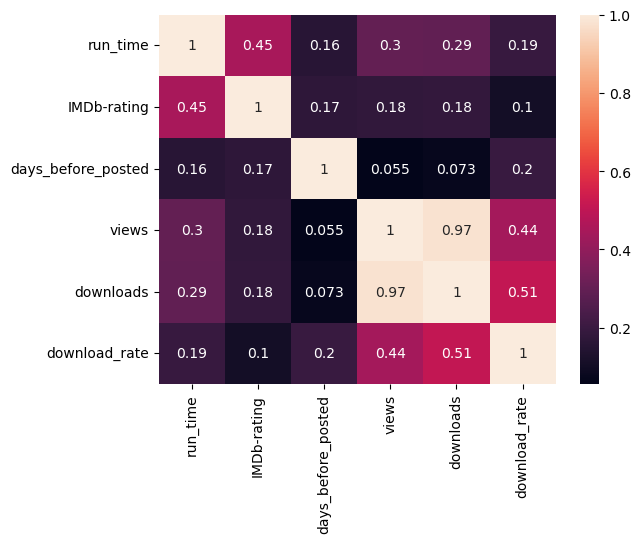

In [18]:
# HEATMAP to show numeric correlations

sns.heatmap(df_modern.corr(numeric_only=True), annot=True)

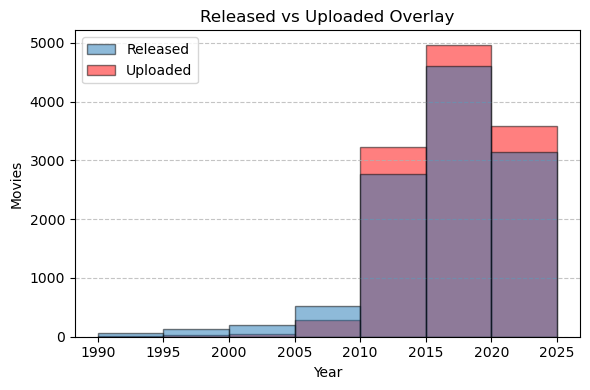

In [19]:
# HISTOGRAM of movies grouped by release and uploaded dates for comparison

bin_year_grps = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]

fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(df['release_date'].dt.year, label='Released', bins=bin_year_grps, edgecolor='black', zorder=2, alpha=0.5)
ax.hist(df['posted_date'].dt.year, label='Uploaded', bins=bin_year_grps, color='red', zorder=1, edgecolor='black', alpha=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('Movies')
ax.set_title('Released vs Uploaded Overlay')
ax.grid(axis='y', linestyle='--', alpha=0.75)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

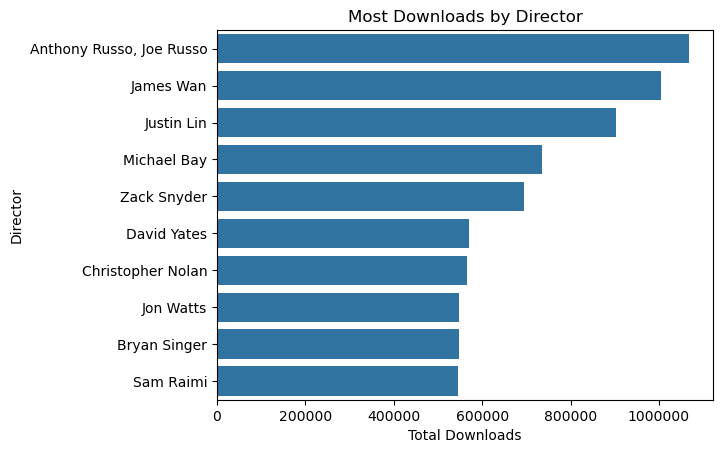

In [27]:
filter_dir = df[df['director'] != 'Not available']

dir_dl = filter_dir.groupby('director')['downloads'].sum()
dir_dl_two = dir_dl.sort_values(ascending=False).head(10)


ax = sns.barplot(x=dir_dl_two.values, y=dir_dl_two.index)
ax.ticklabel_format(style='plain', axis='x')
plt.title('Most Downloads by Director')
plt.xlabel('Total Downloads')
plt.ylabel('Director')
plt.show()

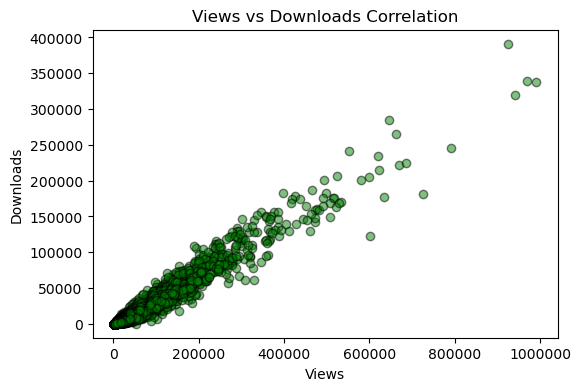

In [24]:
# SCATTERPLOT of views to downloads

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df['views'], df['downloads'], color='green', edgecolors='black', alpha=.5)
ax.ticklabel_format(style='plain', axis='x')
plt.xlabel('Views')
plt.ylabel('Downloads')
plt.title('Views vs Downloads Correlation')
plt.show()

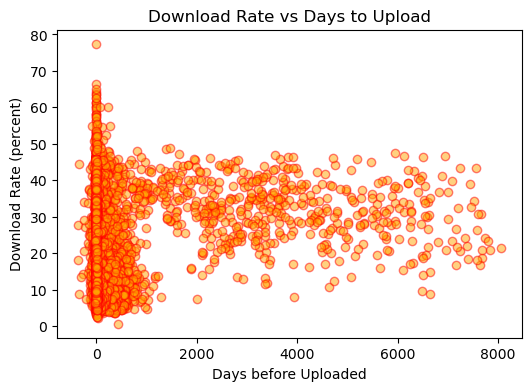

In [26]:
# SCATTERPLOT of Download Rate compared to Days before Uploaded

df_modern = df_modern[df_modern['days_before_posted'] >= -365] # Remove outliers that are likely erroneous.

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_modern['days_before_posted'], df_modern['download_rate'], color='orange', edgecolors='red', alpha=.5)
ax.ticklabel_format(style='plain', axis='y')
plt.xlabel('Days before Uploaded')
plt.ylabel('Download Rate (percent)')
plt.title('Download Rate vs Days to Upload')
plt.show()

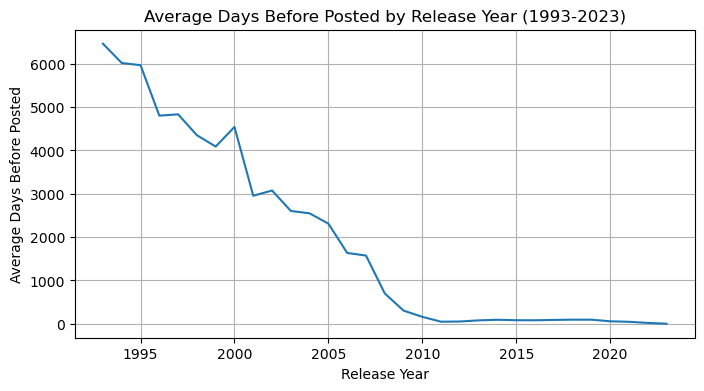

In [30]:
df_modern['release_year'] = df_modern['release_date'].dt.year
avg_upload_days_by_year = df_modern.groupby('release_year')['days_before_posted'].mean()

plt.figure(figsize=(8, 4))
plt.plot(avg_upload_days_by_year.index, avg_upload_days_by_year.values)
plt.xlabel('Release Year')
plt.ylabel('Average Days Before Posted')
plt.title('Average Days Before Posted by Release Year (1993-2023)')
plt.grid(True)
plt.show()